<a href="https://colab.research.google.com/github/Tejesh-JP/My-projects/blob/main/Naivebayesclassificationforpnemonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/BBox_List_2017 (1).csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FL      386 non-null    object 
 1   x       386 non-null    float64
 2   y       386 non-null    float64
 3   w       386 non-null    float64
 4   h       386 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.2+ KB


In [4]:
M = dataset[dataset.FL == "Normal"]

In [5]:
B = dataset[dataset.FL == "Pneumonia"]

In [6]:
M['x']=M['x'].apply(np.ceil)
B['x']=B['x'].apply(np.ceil)
values = [250]
for i in range(250,450):
  values.append(i)
M = M[M.x.isin(values) == True]
B = B[B.x.isin(values) == False]

<ipython-input-6-9d6287748c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M['x']=M['x'].apply(np.ceil)
<ipython-input-6-9d6287748c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['x']=B['x'].apply(np.ceil)


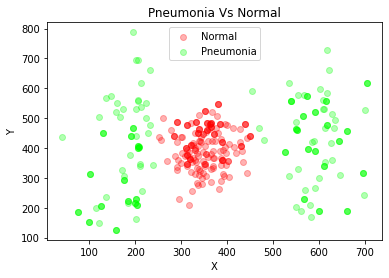

In [7]:
plt.title("Pneumonia Vs Normal")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(M.x, M.y, color = "red", label = "Normal", alpha = 0.3)
plt.scatter(B.x, B.y, color = "lime", label = "Pneumonia", alpha = 0.3)
plt.legend()
plt.show()

In [12]:
for i in dataset.FL:
  if i == "Normal":
    dataset.FL==1
  else:
    dataset.FL==0

In [17]:
x = dataset.drop(["FL"], axis = 1)
y = dataset.FL.values

In [19]:
print(x)

              x           y           w           h
0    277.152542  459.154810  540.203390  301.559322
1    394.305085  402.748030  365.559322  341.694915
2    298.847458  437.459895  548.881356  428.474576
3    366.101695  520.985318  443.661017  267.932203
4    224.000000  416.849725  512.000000  430.644068
..          ...         ...         ...         ...
381  310.779661  400.000000  505.491525  343.864407
382  362.847458  480.271186  401.355932  298.305085
383  338.983051  462.915254  417.627119  393.762712
384  312.949153  344.677966  492.474576  387.254237
385  355.254237  459.661017  445.830509  265.762712

[386 rows x 4 columns]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [22]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9741379310344828
